In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from scipy.ndimage.filters import gaussian_filter
import matplotlib
%matplotlib inline

In [30]:
from matplotlib.colors import LinearSegmentedColormap

def get_continuous_cmap(hex_list, float_list=None):

    rgb_list = [matplotlib.colors.to_rgb(i) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

### Performance matrix

In [31]:
hex_list = ['#F8B195', '#F67280', '#C06C84', '#6C5B7B', '#355C7D'][::-1]

In [118]:
what = 'perf_matrix'
# what = 'pessimism_scale'

root_folder = '/Users/GA/Documents/Dayan_lab/Optimism_And_Pessimism_In_Optimised_Replay/new_figures_data/fig2/d/perf_matrix'
# root_folder = '/Users/GA/Documents/Dayan_lab/Optimism_And_Pessimism_In_Optimised_Replay/Paper/Figures_data/supp1/rat_matrix'

n = 150
tmp = np.zeros((n, n))

for i in range(n):
    z = np.load(os.path.join(root_folder, what+'_%u.npy'%i))
    tmp[i, :] = z

# n = 101
# tmp = np.load(os.path.join(root_folder, what+'.npy'))

In [119]:
# bias = tmp
bias = gaussian_filter(tmp, 3.5)

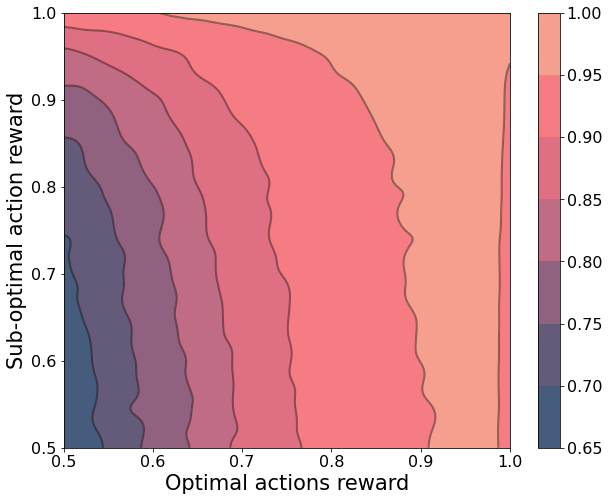

In [121]:
fig = plt.figure(figsize=(10, 8))

x = np.linspace(0.5, 1, n)
y = np.linspace(0.5, 1, n)

X, Y = np.meshgrid(y, x)

k = 6
plt.contourf(X, Y, bias, k, cmap=get_continuous_cmap(hex_list))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.contour(X, Y, bias, k, colors=['k']*k, linewidths=2, alpha=0.4)
plt.xlabel('Optimal actions reward', fontsize=21);
plt.ylabel('Sub-optimal action reward', fontsize=21);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.title(r'Steady-state performace. $\beta=1.5, \alpha=0.62$', fontsize=20)
plt.savefig('/Users/GA/Documents/Dayan_lab/Optimism_And_Pessimism_In_Optimised_Replay/new_figures_data/fig2/d/Performance.svg', transparent=True)